# GEODOS data processing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [6]:
dto = '/storage/stations/Polednik/geodos/2021/08/10/210812'
dto = '/storage/stations/Polednik/geodos/2021/08/13/210720'
#dto = '/storage/stations/Polednik/geodos/2021/10/10'
#dto = '/storage/stations/Polednik/geodos/2021/10/13'
#dto = '/storage/stations/Polednik/geodos/2021/10/EC'
dto = '/storage/experiments/2021/11_geodos10_calibration'
#dto = '/storage/experiments/2021/05_GEODOS_kalibrace/GEO1'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_LS'
#dto = '/storage/experiments/2021/12_test_geodos1024/12k_Zn65_LS'
#dto = '/storage/experiments/2021/12_snih'
dto = '/storage/experiments/2021/12_K40/AIRDOSC_ABS'
dto = '/storage/experiments/2021/12_K40/AIRDOSC_LS_EM'
#dto = '/storage/experiments/2021/1226_GEODOS_BS'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_49_ABSjets'
#dto = '/storage/experiments/2021/12_test_geodos1024/12k_Na22_45'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_BG_LS'
dto = '/storage/experiments/2021/1231_GEODOS_BS'
dto = '/storage/experiments/2021/12_test_geodos1024/12k_13'
dto = '/storage/experiments/2022/0117_vanice/geodos/10'
dto = '/storage/experiments/2022/0120_vanice/geodos/45'
#dto = '/storage/experiments/2022/0120_vanice/geodos/10'
dto = '/storage/experiments/2022/02_ABSJets_AirWatch_A/Airdos_C'
    
fto = dto + '/DATALOG.TXT'

l=[]
l.extend(range(0,1034))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python' )

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)

sn = df.loc[df[0]=='$AIRDOS',3]
fw = df.loc[df[0]=='$AIRDOS',2]
last = df.loc[df[0]=='$AIRDOS'].index
print ('s.n.: ',sn[0])
print ('f.v.: ',fw[0])
print(df.loc[df[0]=='$AIRDOS',1])
print(len(df))
print(last[-1:][0])

# keep only last run
#df.drop(df.index[:last[-1:][0]], inplace=True) 

s.n.:  1290c00806a200924812a000a0000049
f.v.:  0
0        C_ABS_1024_v1
52       C_ABS_1024_v1
5230     C_ABS_1024_v1
5826     C_ABS_1024_v1
5866     C_ABS_1024_v1
             ...      
47620    C_ABS_1024_v1
47670    C_ABS_1024_v1
47722    C_ABS_1024_v1
47762    C_ABS_1024_v1
47792    C_ABS_1024_v1
Name: 1, Length: 70, dtype: object
43027
47792


In [7]:
df

0              1       2                                 3     \
0      $AIRDOS  C_ABS_1024_v1       0  1290c00806a200924812a000a0000049   
2       $GLGSV              1       1                                00   
3       $GNGLL            NaN     NaN                               NaN   
4       $GNTXT             01      01                                02   
5       $GNRMC            NaN       V                               NaN   
...        ...            ...     ...                               ...   
47843    $HITS             25    5398                                45   
47844    $HIST             15  202.92                          98100.50   
47845    $HITS             27    7939                                28   
47846    $HIST             16  215.58                          98101.00   
47847    $HITS             24    2465                               112   

               4      5      6     7      8        9     ... 1024  1025 1026  \
0              None   None   None  None   None     None  ...  NaN   NaN  NaN   
2              None   None   None  None   None     None  ...  NaN   NaN  NaN   
3               NaN    NaN      V     N   None     None  ...  NaN   NaN  NaN   
4      ANTSTATUS=OK   None   None  None   None     None  ...  NaN   NaN  NaN   
5               NaN    NaN    NaN   NaN    NaN      NaN  ...  NaN   NaN  NaN   
...             ...    ...    ...   ...    ...      ...  ...  ...   ...  ...   
47843          7666     37  18748    38  19638       57  ...  NaN   NaN  NaN   
47844         24.69  -0.26   -257  -257   -257  -298.85  ...  NaN   NaN  NaN   
47845          7951     31   8034    34  12182       58  ...  NaN   NaN  NaN   
47846         24.75  -0.26   -257  -257   -257  -298.85  ...  NaN   NaN  NaN   
47847          5007     87   6137    44   8648       77  ...  NaN   NaN  NaN   

       1027  1028  1029  1030  1031  1032  1033  
0       NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2       NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5       NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...  
47843   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
47844   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
47845   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
47846   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
47847   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[43027 rows x 1034 columns]

## Fill position and time (Galileo)

In [8]:
#df.drop(df.loc[(df[0]=='$GNRMC') & (df[2]=='V')].index, inplace=True)
df.loc[(df[0]=='$GNRMC'),'flag']=True
df.loc[(df[0]=='$HIST'),'flag']=False
df.flag = df.flag.fillna(method='ffill')
df['latf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',3])
df['lonf'] = pd.to_numeric(df.loc[df[0]=='$GNRMC',5])
#df.loc[(df[0]=='$TIME') & (df['flag']),'on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
#df['on_miliseconds'] = pd.to_numeric(df.loc[df[0]=='$TIME',1]) * 1000
df['on_miliseconds'] = pd.to_numeric(df.loc[(df[0]=='$TIME') & (df['flag']),1]) * 1000
df['miliseconds'] = pd.to_numeric(df.loc[df[0]=='$HIST',2]) * 1000
df['gps_time'] = df.loc[df[0]=='$GNRMC',1]
df['gps_date'] = df.loc[df[0]=='$GNRMC',9]
df['alt'] = df.loc[df[0]=='$GNGGA',9]
df.loc[(df[0]=='$GNRMC') & (df[6]=='E'),'lon_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[6]=='W'),'lon_hem']=-1
df.loc[(df[0]=='$GNRMC') & (df[4]=='N'),'lat_hem']=1
df.loc[(df[0]=='$GNRMC') & (df[4]=='S'),'lat_hem']=-1
df['lat'] = (np.trunc(df['latf']/100) + (((df['latf']/100) - np.trunc(df['latf']/100)) * 100) / 60.0) * df['lat_hem']
df['lon'] = (np.trunc(df['lonf']/100) + ((df['lonf']/100) - np.trunc(df['lonf']/100)) * 100 / 60.0) * df['lon_hem']  
df['date'] = pd.to_datetime(df['gps_date']+df['gps_time'], format='%d%m%y%H%M%S.%f')#,errors='coerce')
df.drop('lon_hem', axis=1, inplace=True)
df.drop('lat_hem', axis=1, inplace=True)
df.drop('latf', axis=1, inplace=True)
df.drop('lonf', axis=1, inplace=True)
df.drop('gps_time', axis=1, inplace=True)
df.drop('gps_date', axis=1, inplace=True)
df['meas'] = df.index
#df['meas'] = df.loc[df[0]=='$HIST',1]
df.loc[df[0]=='$HITS','meas'] = np.nan
df = df.fillna(method='ffill')
df.meas = df.meas.astype(int)
df.drop(df[df[0]=='$GPGGA'].index, inplace=True)
df.drop(df[df[0]=='$GNRMC'].index, inplace=True)
df.drop(df[df[0]=='$AIRDOS'].index, inplace=True)
df.drop(df[df[0]=='$TIME'].index, inplace=True)
df['UTC'] = df['date'] + pd.to_timedelta(df['miliseconds'], unit='ms') - pd.to_timedelta(df['on_miliseconds'], unit='ms')
#df.drop('date', axis=1, inplace=True)
#df.drop('miliseconds', axis=1, inplace=True)
#df.drop('on_miliseconds', axis=1, inplace=True)
df.iloc[-10:]

0   1       2         3      4      5      6     7      8        9  \
47838  $HIST  12  165.89  98103.75  24.75  -0.26   -257  -257   -257  -298.85   
47839  $HITS  19    6334        88   6543     45   8867    69  17739      123   
47840  $HIST  13  178.23  98098.75  24.69  -0.26   -257  -257   -257  -298.85   
47841  $HITS  22     285        38   2313    113   8367    44  24310      164   
47842  $HIST  14  190.57  98100.25  24.69  -0.26   -257  -257   -257  -298.85   
47843  $HITS  25    5398        45   7666     37  18748    38  19638       57   
47844  $HIST  15  202.92  98100.50  24.69  -0.26   -257  -257   -257  -298.85   
47845  $HITS  27    7939        28   7951     31   8034    34  12182       58   
47846  $HIST  16  215.58  98101.00  24.75  -0.26   -257  -257   -257  -298.85   
47847  $HITS  24    2465       112   5007     87   6137    44   8648       77   

       ... 1033   flag on_miliseconds  miliseconds    alt        lat  \
47838  ...  NaN  False         4120.0     165890.0  153.2  48.164454   
47839  ...  NaN  False         4120.0     165890.0  153.2  48.164454   
47840  ...  NaN  False         4120.0     178230.0  153.2  48.164454   
47841  ...  NaN  False         4120.0     178230.0  153.2  48.164454   
47842  ...  NaN  False         4120.0     190570.0  153.2  48.164454   
47843  ...  NaN  False         4120.0     190570.0  153.2  48.164454   
47844  ...  NaN  False         4120.0     202920.0  153.2  48.164454   
47845  ...  NaN  False         4120.0     202920.0  153.2  48.164454   
47846  ...  NaN  False         4120.0     215580.0  153.2  48.164454   
47847  ...  NaN  False         4120.0     215580.0  153.2  48.164454   

            lon                date   meas                     UTC  
47838  17.19519 2022-03-29 10:58:52  47838 2022-03-29 11:01:33.770  
47839  17.19519 2022-03-29 10:58:52  47838 2022-03-29 11:01:33.770  
47840  17.19519 2022-03-29 10:58:52  47840 2022-03-29 11:01:46.110  
47841  17.19519 2022-03-29 10:58:52  47840 2022-03-29 11:01:46.110  
47842  17.19519 2022-03-29 10:58:52  47842 2022-03-29 11:01:58.450  
47843  17.19519 2022-03-29 10:58:52  47842 2022-03-29 11:01:58.450  
47844  17.19519 2022-03-29 10:58:52  47844 2022-03-29 11:02:10.800  
47845  17.19519 2022-03-29 10:58:52  47844 2022-03-29 11:02:10.800  
47846  17.19519 2022-03-29 10:58:52  47846 2022-03-29 11:02:23.460  
47847  17.19519 2022-03-29 10:58:52  47846 2022-03-29 11:02:23.460  

[10 rows x 1043 columns]

## Add individual events to histogram

In [9]:
HISTHITS = 25 # LS
#HISTHITS = 20
#HISTHITS = 28 # ABSjets
FIRSTCH = 4

df.dropna(subset=['UTC'], inplace=True)
hist = df.loc[df[0]=='$HIST'].iloc[:,:10+HISTHITS].copy()
hist.iloc[:,1:] = hist.iloc[:,1:].apply(pd.to_numeric) #,errors='coerce')
#hist[0] = df[0]
hist['alt'] = df['alt'].apply(pd.to_numeric,errors='coerce')
hist['lat'] = df['lat'].apply(pd.to_numeric,errors='coerce')
hist['lon'] = df['lon'].apply(pd.to_numeric,errors='coerce')
hist['meas'] = df['meas'].apply(pd.to_numeric,errors='coerce')
hist['UTC'] = df['UTC']
#hist.iloc[:,18:269] = 0
hist.set_index('meas', inplace=True)

hits = df.loc[df[0]=='$HITS'].copy()
#hits['meas'] = hist.index
hits.iloc[:,1:] = hits.iloc[:,1:].apply(pd.to_numeric)
hits['UTC'] = df['UTC']
hits.set_index('meas', inplace=True)


In [26]:
hist

0   1       2         3      4     5    6    7    8       9  ...  \
meas                                                                    ...   
131    $HIST  18  247.50  97221.25  25.44 -0.26 -257 -257 -257 -298.85  ...   
133    $HIST  19  260.44  97225.25  25.44 -0.26 -257 -257 -257 -298.85  ...   
135    $HIST  20  273.10  97225.75  25.44 -0.26 -257 -257 -257 -298.85  ...   
137    $HIST  21  285.75  97222.50  25.44 -0.26 -257 -257 -257 -298.85  ...   
139    $HIST  22  298.90  97222.00  25.44 -0.26 -257 -257 -257 -298.85  ...   
...      ...  ..     ...       ...    ...   ...  ...  ...  ...     ...  ...   
47838  $HIST  12  165.89  98103.75  24.75 -0.26 -257 -257 -257 -298.85  ...   
47840  $HIST  13  178.23  98098.75  24.69 -0.26 -257 -257 -257 -298.85  ...   
47842  $HIST  14  190.57  98100.25  24.69 -0.26 -257 -257 -257 -298.85  ...   
47844  $HIST  15  202.92  98100.50  24.69 -0.26 -257 -257 -257 -298.85  ...   
47846  $HIST  16  215.58  98101.00  24.75 -0.26 -257 -257 -257 -298.85  ...   

        29   30   31   32   33   34    alt        lat       lon  \
meas                                                              
131    1.0  1.0  2.0  2.0  1.0  1.0    NaN        NaN       NaN   
133    2.0  0.0  0.0  0.0  1.0  1.0    NaN        NaN       NaN   
135    3.0  0.0  1.0  2.0  2.0  2.0    NaN        NaN       NaN   
137    0.0  0.0  0.0  0.0  1.0  0.0    NaN        NaN       NaN   
139    0.0  1.0  1.0  0.0  1.0  1.0    NaN        NaN       NaN   
...    ...  ...  ...  ...  ...  ...    ...        ...       ...   
47838  2.0  2.0  1.0  2.0  0.0  2.0  153.2  48.164454  17.19519   
47840  1.0  0.0  0.0  0.0  2.0  1.0  153.2  48.164454  17.19519   
47842  3.0  0.0  1.0  1.0  2.0  2.0  153.2  48.164454  17.19519   
47844  1.0  0.0  1.0  0.0  1.0  1.0  153.2  48.164454  17.19519   
47846  0.0  1.0  0.0  1.0  0.0  1.0  153.2  48.164454  17.19519   

                          UTC  
meas                           
131   2022-01-05 09:22:10.750  
133   2022-01-05 09:22:23.690  
135   2022-01-05 09:22:36.350  
137   2022-01-05 09:22:49.000  
139   2022-01-05 09:23:02.150  
...                       ...  
47838 2022-03-29 11:01:33.770  
47840 2022-03-29 11:01:46.110  
47842 2022-03-29 11:01:58.450  
47844 2022-03-29 11:02:10.800  
47846 2022-03-29 11:02:23.460  

[14817 rows x 39 columns]

In [10]:
hits.loc[hits[1]>500,1]=500
hits.loc[:,[*map('h{:04}'.format, range(1050))]] = 0
try:
    for i in range(len(hits)):
        for j in range(hits.iloc[i,1]):
            hits.iloc[i,int(1042+hits.iloc[i,j*2+3])] +=1
except:
    print(i,j)
    raise
            
histogram = pd.DataFrame()
histogram = hist.iloc[:,10+FIRSTCH:10+HISTHITS]
histogram = histogram.join(hits.iloc[:,1042+HISTHITS:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram['UTC'] = hist['UTC']

histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:1024],range(0,1024))})
#histogram.to_csv(dto + '/histogram.csv')
histogram[:5]

0    1    2    3    4    5    6    7    8    9  ...  h1045  h1046  \
meas                                                    ...                 
131   3.0  2.0  8.0  4.0  3.0  2.0  5.0  3.0  1.0  3.0  ...    0.0    0.0   
133   8.0  9.0  4.0  2.0  6.0  1.0  2.0  2.0  4.0  1.0  ...    0.0    0.0   
135   3.0  3.0  6.0  2.0  4.0  3.0  4.0  5.0  1.0  3.0  ...    0.0    0.0   
137   8.0  3.0  5.0  3.0  5.0  3.0  3.0  0.0  4.0  3.0  ...    0.0    0.0   
139   5.0  2.0  2.0  2.0  3.0  2.0  2.0  3.0  2.0  0.0  ...    0.0    0.0   

      h1047  h1048  h1049  temperature  pressure  voltage  current  \
meas                                                                 
131     0.0    0.0    0.0        25.44  97221.25    -0.26     -257   
133     0.0    0.0    0.0        25.44  97225.25    -0.26     -257   
135     0.0    0.0    0.0        25.44  97225.75    -0.26     -257   
137     0.0    0.0    0.0        25.44  97222.50    -0.26     -257   
139     0.0    0.0    0.0        25.44  97222.00    -0.26     -257   

                         UTC  
meas                          
131  2022-01-05 09:22:10.750  
133  2022-01-05 09:22:23.690  
135  2022-01-05 09:22:36.350  
137  2022-01-05 09:22:49.000  
139  2022-01-05 09:23:02.150  

[5 rows x 1051 columns]

In [27]:
histogram['alt'] = hist['alt']

## Plot Flux

<ipython-input-41-23103171d32a>:16: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']


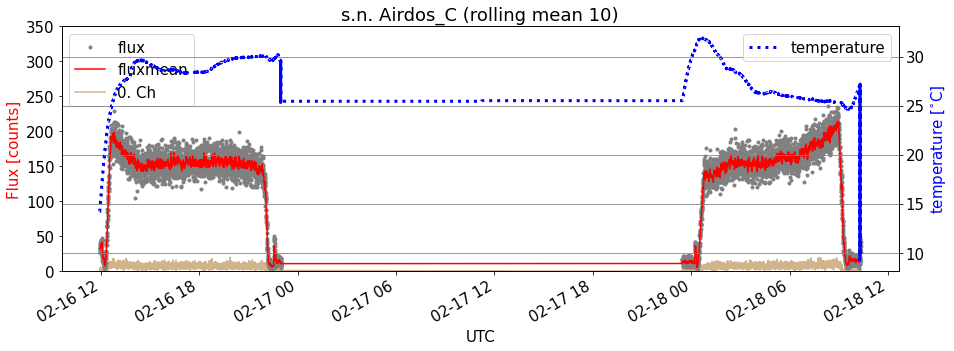

In [41]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-1-1 00:00:00':'2022-2-1 00:00:00']
xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



<ipython-input-61-9a53cb3ae05e>:17: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xx = xx.loc['2022-2-16 12:11:20':'2022-2-16 12:20:00']


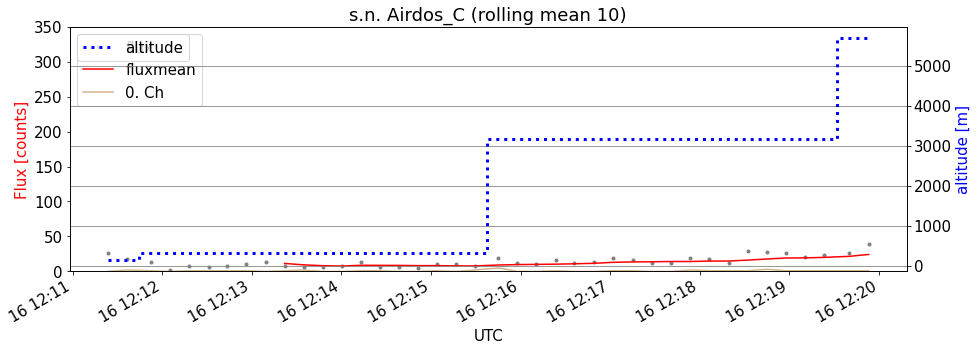

In [61]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-3-18 00:00:00']
#xx = xx.loc['2022-2-13 00:00:00':'2022-2-22 00:00:00']
xx = xx.loc['2022-2-16 12:11:20':'2022-2-16 12:20:00']
#xx = xx.loc['2022-3-15 00:00:00':'2022-3-20 00:00:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([0,350])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['alt'].plot(c='blue', label='altitude', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'altitude [m]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



In [62]:
xx

0    1    2    3    4    5    6    7    8    9  \
UTC                                                                         
2022-02-16 12:11:23.620  0.0  2.0  1.0  0.0  2.0  0.0  5.0  1.0  0.0  2.0   
2022-02-16 12:11:36.170  2.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   
2022-02-16 12:11:52.240  1.0  0.0  0.0  2.0  1.0  1.0  0.0  0.0  2.0  1.0   
2022-02-16 12:12:05.070  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:12:17.900  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2022-02-16 12:12:31.550  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:12:43.580  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2022-02-16 12:12:56.410  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:13:09.250  0.0  1.0  1.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:13:22.090  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:13:34.930  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:13:47.760  0.0  1.0  0.0  0.0  0.0  0.0  1.0  2.0  0.0  0.0   
2022-02-16 12:14:00.600  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2022-02-16 12:14:13.140  1.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  2.0  0.0   
2022-02-16 12:14:25.990  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:14:38.530  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:14:51.370  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2022-02-16 12:15:03.910  1.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
2022-02-16 12:15:16.760  0.0  1.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  0.0   
2022-02-16 12:15:29.610  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2022-02-16 12:15:45.260  5.0  3.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:15:57.820  0.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:16:10.690  0.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  2.0   
2022-02-16 12:16:23.540  1.0  2.0  0.0  2.0  0.0  1.0  0.0  1.0  1.0  0.0   
2022-02-16 12:16:36.120  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:16:48.990  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0   
2022-02-16 12:17:01.860  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
2022-02-16 12:17:15.220  1.0  0.0  1.0  0.0  1.0  2.0  0.0  2.0  0.0  0.0   
2022-02-16 12:17:27.910  0.0  1.0  1.0  0.0  1.0  0.0  0.0  2.0  0.0  0.0   
2022-02-16 12:17:40.770  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:17:53.660  2.0  1.0  1.0  1.0  0.0  2.0  0.0  1.0  0.0  0.0   
2022-02-16 12:18:06.520  1.0  0.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  1.0   
2022-02-16 12:18:19.410  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2022-02-16 12:18:32.270  1.0  1.0  3.0  1.0  1.0  1.0  2.0  0.0  1.0  1.0   
2022-02-16 12:18:45.170  3.0  2.0  2.0  0.0  2.0  1.0  1.0  2.0  1.0  1.0   
2022-02-16 12:18:57.760  1.0  1.0  0.0  1.0  1.0  1.0  1.0  4.0  1.0  0.0   
2022-02-16 12:19:10.660  1.0  0.0  1.0  0.0  1.0  0.0  2.0  0.0  1.0  1.0   
2022-02-16 12:19:23.270  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   
2022-02-16 12:19:40.260  1.0  1.0  2.0  1.0  1.0  2.0  2.0  3.0  0.0  1.0   
2022-02-16 12:19:53.160  1.0  0.0  1.0  2.0  1.0  0.0  1.0  2.0  1.0  1.0   

                         ...  h1048  h1049  temperature   pressure  voltage  \
UTC                      ...                                                  
2022-02-16 12:11:23.620  ...    0.0    0.0        19.31  101323.25    -0.26   
2022-02-16 12:11:36.170  ...    0.0    0.0        19.44  101279.25    -0.26   
2022-02-16 12:11:52.240  ...    0.0    0.0        19.50  101223.75    -0.26   
2022-02-16 12:12:05.070  ...    0.0    0.0        19.56  101335.50    -0.26   
2022-02-16 12:12:17.900  ...    0.0    0.0        19.63  101444.50    -0.26   
2022-02-16 12:12:31.550  ...    0.0    0.0        19.69  101585.75    -0.26   
2022-02-16 12:12:43.580  ...    0.0    0.0        19.75  101680.25    -0.26   
2022-02-16 12:12:56.410  ...    0.0    0.0        19.81  101776.50    -0.26   
20

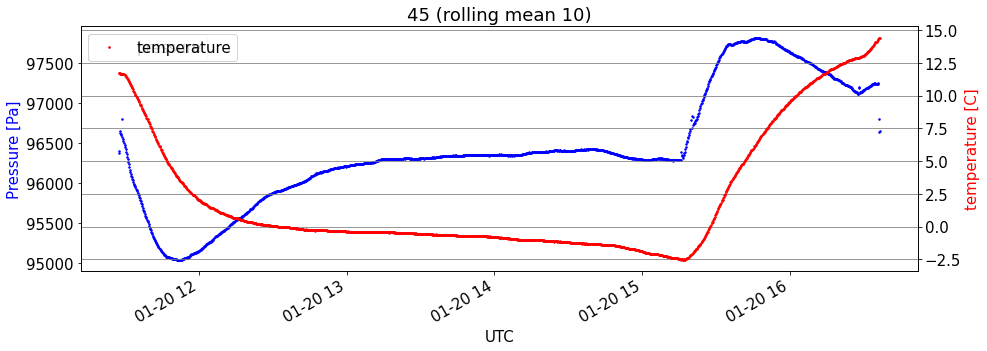

In [9]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']



xx['pressure'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'pressure')

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Pressure [Pa]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('temperature [C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



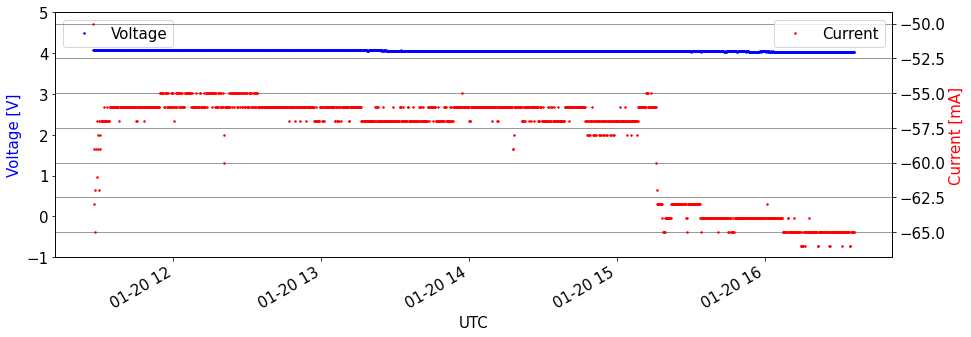

In [11]:
plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 00:00:00':'2021-08-16 00:00:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']



xx['voltage'].plot(c='blue', linestyle='', marker='.', ms=3, label = 'Voltage')

s = fto.split('/')
#plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylim([-1,5])
plt.xlabel('UTC')
plt.ylabel(r'Voltage [V]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['current'].plot(c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel('Current [mA]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



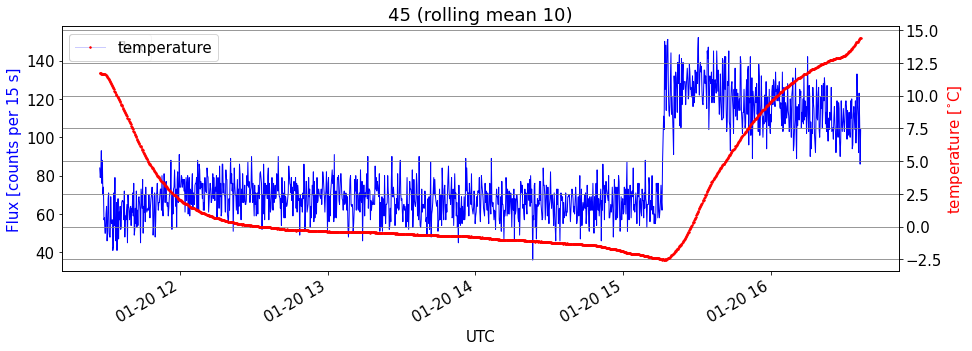

In [13]:
NOISE_LEVEL = 0
LAST_CHANNEL = 240
WINDOW = 10

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})


xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2020-12-04 11:55:00':'2020-12-04 12:20:00']
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

#xx['flux'].plot(c='gray', marker='.', linewidth=1)
xx['flux'].plot(c='blue', linewidth=1)
#xx['fluxmean'].plot(c='red')
#(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)

s = fto.split('/')
plt.title(s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts per 15 s]', color='blue')
plt.legend(loc=2)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='red', label='temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='red')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()



# Blitzortung

In [19]:
lat=49.0640992 # Polednik
lon=13.3950208

start=pd.Timestamp('2021-08-15 12:00')
end=pd.Timestamp('2021-08-16 18:00')

BLITZ_DIST = 60

print(start, end, lat, lon)
region=1

### url for json data preparation
url=[]

for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))

import requests
blitz=pd.DataFrame()
for i in range(len(url)):
    try:
        html = requests.get(url[i]).content
        blitz_part = pd.read_json(html,lines=True)
        #blitz_part.drop(columns=['status','sig'], inplace=True)#,'region', 
        blitz=blitz.append(blitz_part)
    except:
        print("No data", url[i])
        pass
blitz.set_index(['time'], inplace=True)

### reduction of too distant events
blitz=blitz[(blitz['lat']>(lat-2) )&(blitz['lat']<(lat+2) )]
blitz=blitz[(blitz['lon']>(lon-3.5) )&(blitz['lon']<(lon+3.5) )]

### calculation of distance of events from station
#from math import radians, cos, sin, asin, sqrt, atan2, degrees
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
    pass
#blitz['time']=blitz.index    
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
blitz.reset_index(inplace=True)
blitz.set_index('date', inplace=True)

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz.drop(columns=['lonRad','latRad','DlonRad','DlatRad','a'], inplace=True)
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
blitz = blitz.loc[blitz['km'] < BLITZ_DIST]
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
#blitz.reset_index(inplace=True)
#blitz.set_index('date', inplace=True)

blitz.to_csv(dto + "/blitz.csv")

print('end')

2021-08-15 12:00:00 2021-08-16 18:00:00 49.0640992 13.3950208
No columns to drop (alt, pol, region)
end


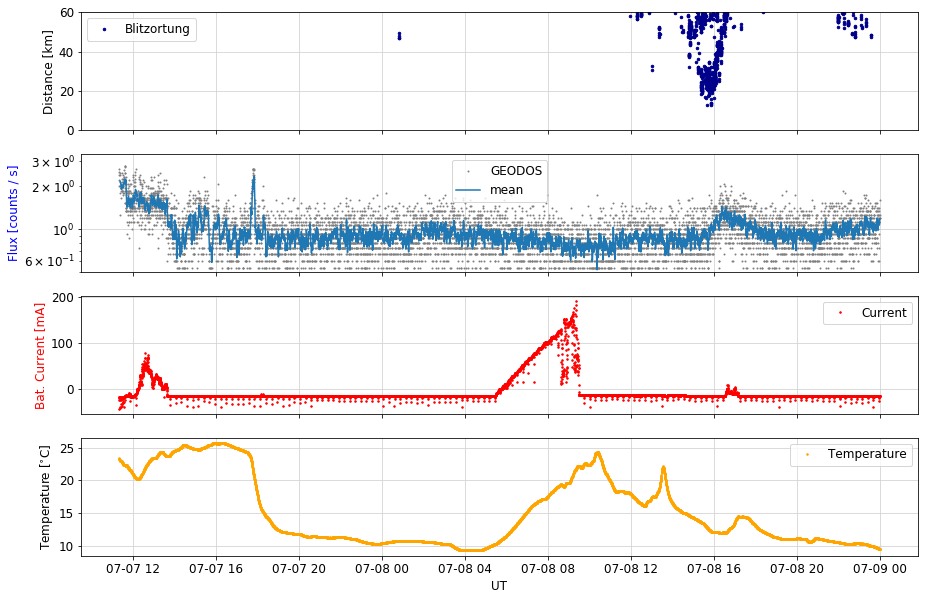

In [52]:
WINDOW = 10

FROM = '2021-07-07 00:00:00'
TO = '2021-07-09 00:00:00'

blitz = pd.read_csv(dto + "/blitz.csv")
blitz['date'] = pd.to_datetime(blitz['date'])
blitz.set_index('date', inplace=True)

fig, (ax6, ax3, ax5, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
matplotlib.rcParams.update({'font.size': 12})

xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2021-08-15 12:00:00':'2021-08-16 18:00:00']
xx = xx.loc[FROM:TO]

blitzblitz = blitz.loc[FROM:TO]

xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

ax3.plot(xx['flux']/15, marker='.', color='gray', label='GEODOS', ms=2, linestyle='none')
ax3.plot(xx['fluxmean']/15, label='mean')
ax3.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax3.set_ylabel(r'Flux [counts / s]', color='blue')
ax3.set_yscale('log')
ax3.set_ylim(0.5,)
ax3.legend()

ax4.plot(xx['temperature'], c='orange', label='Temperature', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax4.set_xlabel('UT')
ax4.set_ylabel(r'Temperature [$^{\circ}$C]')
ax4.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax4.legend()

ax6.plot(blitzblitz.index, blitzblitz.km, ls='', marker='.', ms=5, label='Blitzortung', c='darkblue')
ax6.set_ylabel('Distance [km]')
ax6.legend()
ax6.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax6.set_ylim(0,60)

ax5.plot(xx['current'], c='red', label='Current', marker='.', ms=3, linewidth='1', linestyle='none', drawstyle='steps-mid')
ax5.set_ylabel('Bat. Current [mA]', color='red')
ax5.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax5.legend()


# Energy Spectrum

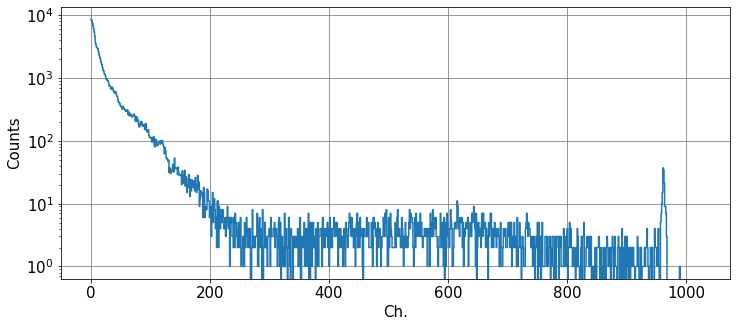

In [14]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#yy = yy.loc['2021-07-08 17:00:00':'2021-07-08 18:00:00']
#yy = yy.loc['2022-1-17 17:39:00':'2022-1-17 17:45:00']
#yy = yy.loc['2022-1-17 17:35:00':'2022-1-17 17:45:00']

#yy = yy.loc['2021-05-12 11:20:00':'2021-05-12 11:30:00']
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
#plt.xlim([0,200])

(0.0, 4.0)

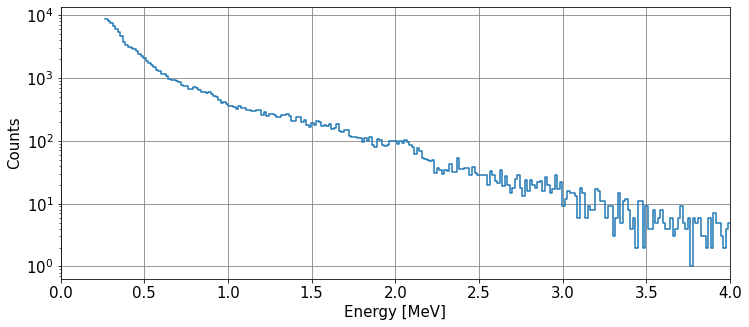

In [15]:
yy = histogram.copy()
yy.set_index('UTC', inplace = True, drop=False)

#yy = yy.loc['2021-08-15 11:00:00':'2021-08-16 18:00:00']
#yy = yy.loc['2021-08-16 10:00:00':'2021-08-16 12:00:00']
#yy = yy.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#yy = yy.loc['2021-07-08 17:00:00':'2021-07-08 18:00:00']

#yy = yy.loc['2022-1-17 17:35:00':'2022-1-17 17:45:00']

#yy = yy.loc['2021-05-12 11:20:00':'2021-05-12 11:30:00']
#yy = yy.loc['2021-05-12 13:58:00':'2021-05-12 14:20:00']

#yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:1024],range(0,1024))})
ener = yy.iloc[:,0:1024].sum()
ener = ener.reset_index()
ener['ener'] = 0.015 * ener.index + 0.268 

plt.figure(figsize=(12,5))
plt.plot(ener['ener'], ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,4])
#plt.ylim([0,250])

In [17]:
ener['ener'] = 0.015 * ener.index + 0.268 


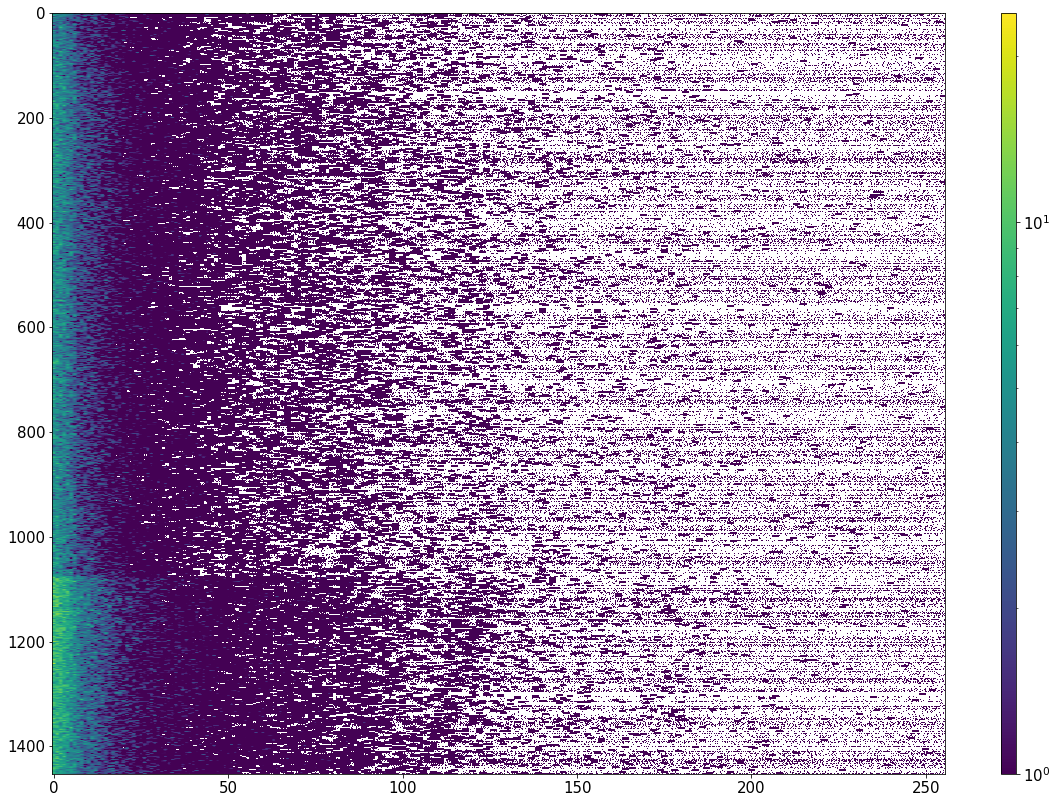

In [18]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(20, 14))
plt.imshow((histogram.iloc[:,0:256]), aspect='auto', norm=LogNorm())
plt.colorbar(aspect=50)
None

(0.0, 30.0)

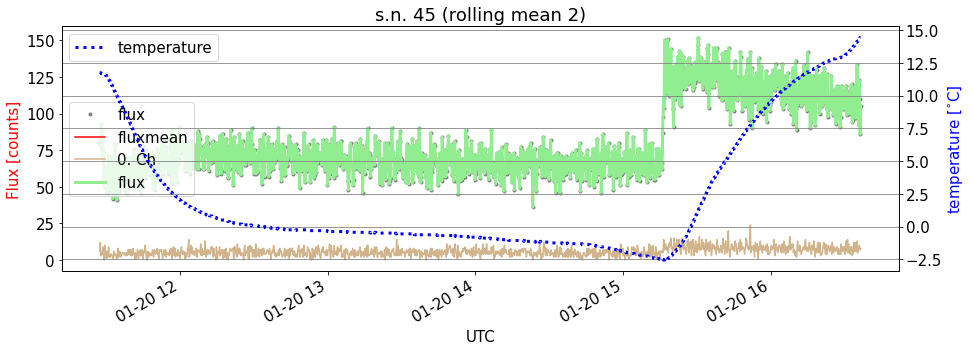

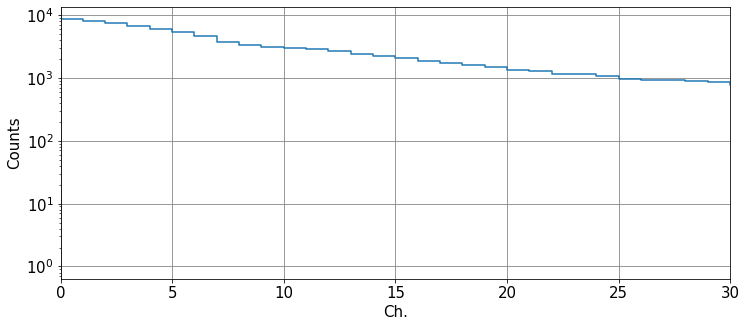

In [20]:
NOISE_LEVEL = 0
LAST_CHANNEL = 256
WINDOW = 2

plt.figure(figsize=(15,5))
plt.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

#histogram.read_csv(dto + '/histogram.csv')
xx = histogram.copy()
xx.set_index('UTC', inplace = True, drop=False)
#xx = xx.loc['2019-11-27 00:00:00':'2019-11-29 01:30:00']
#xx = xx.loc['2021-08-15 17:45:00':'2021-08-15 18:40:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
#xx = xx.loc['2021-05-12 8:35:00':'2021-05-12 16:00:00']
#xx = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']

#plt.yscale('log')
xx['flux'] = (xx.iloc[:,range(NOISE_LEVEL,LAST_CHANNEL)].sum(axis=1))
#yy = xx.loc['2021-05-12 11:05:00':'2021-05-12 11:30:00']
#yy = xx.loc['2021-11-30 12:35:00':'2021-11-30 12:45:00']
yy = xx

xx['fluxmean'] = xx['flux'].rolling(WINDOW).mean()

xx['flux'].plot(c='gray', linestyle='', marker='.')
xx['fluxmean'].plot(c='red')
(xx.iloc[:,NOISE_LEVEL]).plot(c='tan',label= str(NOISE_LEVEL) + '. Ch' ,zorder=1)
yy['flux'].plot(c='lightgreen', linewidth='3')

s = fto.split('/')
plt.title("s.n. " + s[len(s)-2] + ' (rolling mean ' + str(WINDOW) + ')')
#plt.ylim([0,1.5])
plt.xlabel('UTC')
plt.ylabel(r'Flux [counts]', color='red')
plt.legend(loc=6)

ax = plt.twinx()

#plt.ylim([0,14000])
xx['temperature'].plot(c='blue', label='temperature', linewidth='3', linestyle=':', drawstyle='steps-mid')
plt.ylabel(r'temperature [$^{\circ}$C]', color='blue')

plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.legend()

yy = yy.rename(columns={x:y for x,y in zip(yy.columns[:258],range(0,258))})
ener = yy.iloc[:,0:240].sum()
ener = ener.reset_index()
plt.figure(figsize=(12,5))
plt.plot(ener[0], drawstyle='steps-post')
plt.yscale('log')
plt.xlabel('Ch.')
plt.ylabel('Counts')
#plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(color='grey')
plt.xlim([0,30])

In [21]:
l = np.array([[1, 1],[5,1]]) # Calibration
r = np.array([0.511, 1.275])
coef = np.linalg.solve(l,r)
print (coef[0], coef[1])
255  * coef[0] + coef[1]

0.19099999999999998 0.32


49.02499999999999

In [47]:
raise # nedodelano

hits.loc[hits[1]>500,1]=500
hits.loc[:,[*map('h{:04}'.format, range(1050))]] = 0
            
nchannels = 1024

try:
    for i in range(len(hits)):
        nevents = hits.iloc[i,1]
        events_chan = hits.iloc[i,3::2][:nevents]
        hits.iloc[i,1042:1042+nchannels] = np.bincount(events_chan, minlength=nchannels)
except:
    print(i)
    raise
    
histogram = pd.DataFrame()
histogram = hist.iloc[:,10+FIRSTCH:10+HISTHITS]
histogram = histogram.join(hits.iloc[:,1042+HISTHITS:])
histogram['temperature'] = hist[4]
histogram['pressure'] = hist[3]
histogram['voltage'] = hist[5]
histogram['current'] = hist[6]
histogram['UTC'] = hist['UTC']
histogram = histogram.rename(columns={x:y for x,y in zip(histogram.columns[:1024],range(0,1024))})
#histogram.to_csv(dto + '/histogram.csv')
histogram

RuntimeError: No active exception to reraise